# Finite-Difference Methods
Computers are not designed to solve differential equations directly. Although computers can perform algebraic operations with ease, it does not have any intrinsic ability to differentiate or integrate. 

Every numerical technique is designed to convert the original differential equation into a set of solvable algebraic equations. As part of this task the continuous functions associated with the original problem must be represented by a finite set of numbers that can be stored in a computer's memory or on disk. 


### Two problems that must be addressed
* How to represent a continuous solution with a finite data set? 
* How to compute derivates and integrals? 


### Initial-Value Problem
To describe various numerical methods, we begin by defining an **initial-value problem**, which is a combination of a differential equation (or set of equations) and boundary conditions.

<br />

$$
\begin{align}
\frac{\partial y}{\partial x} = f(x, y) && y(x_0) = y_0 && x_{min} \leq x \leq x_{max}
\end{align}
$$

<br />


In [106]:
import numpy as np

import pandas as pd

import seaborn as sns

from tqdm import trange # progress bars for long running cells

# Discretization
[Discretization](https://en.wikipedia.org/wiki/Discretization) is the process of representing a continuous function as a series of discrete values and is one of the first steps we need to take in order to perform numerical analysis. We choose a small **step size** $\Delta x$. The size of $\Delta x$ determines the accuracy of the approximate solution as well as the number of computations that are necessary to obtain the approxmiation.


<br />

$$
\Delta x = \frac{x_{max} - x_{min}}{N}
$$

<br />

where _N_ is the number of steps (i.e. computations) we want to perform. With this definition in hand, we can compute $x_{n+1}$ quite easily, 

<br />

$$
x_{n+1} = \Delta x + x_{n}
$$

<br />

To obtain $y_{n+1}$ from $x_{n}$ and $y_{n}$, we use the differential equation (see Euler's Method below). 

###  Experimenting with  `np.linspace` & $\Delta x$

In [107]:
def calc_dx(xmax, xmin, size):
    return (xmax - xmin) / size

def gen_all_x_values(x0, dx, size):
    x = []
    x.append(x0)
    for _ in trange(size):
        x.append(dx + x[-1])
        
x_max = 1
x_min = -1

In [110]:
N = 100_000

dx = calc_dx(x_max, x_min, N)

gen_all_x_values(x_min, dx, N)

100%|██████████████████████████████| 100000/100000 [00:00<00:00, 1525550.94it/s]


In [112]:
N = 1_000_000

dx = calc_dx(x_max, x_min, N)

gen_all_x_values(x_min, dx, N)

100%|████████████████████████████| 1000000/1000000 [00:00<00:00, 2376997.05it/s]


[np.linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) is much more performant than our hand rolled function, 

In [114]:
np.linspace(x_min, x_max, N)

array([-1.      , -0.999998, -0.999996, ...,  0.999996,  0.999998,
        1.      ])

In [115]:
N = 10_000_000

dx = calc_dx(x_max, x_min, N)

gen_all_x_values(x_min, dx, N)

100%|██████████████████████████| 10000000/10000000 [00:03<00:00, 3089876.93it/s]


Using `np.linspace`, 

In [116]:
np.linspace(x_min, x_max, N)

array([-1.       , -0.9999998, -0.9999996, ...,  0.9999996,  0.9999998,
        1.       ])

In [117]:
N = 100_000_000

dx = calc_dx(x_max, x_min, N)

gen_all_x_values(x_min, dx, N)

100%|████████████████████████| 100000000/100000000 [00:31<00:00, 3143200.10it/s]


Using `np.linspace`, 

In [118]:
np.linspace(x_min, x_max, N)

array([-1.        , -0.99999998, -0.99999996, ...,  0.99999996,
        0.99999998,  1.        ])

1 Billion steps seems to be the breaking point. `np.linspace` starts to take quite a while to complete, 

In [10]:
# N = 1_000_000_000
# np.linspace(x_min, x_max, N)

### `np.linspace` vs. `calc_dx`

In [119]:
N = 1_000_000

x = np.linspace(x_min, x_max, N)
dx = calc_dx(x_max, x_min, N)

print(f"dx: {dx}")
print(f"np.linspace: {(x[1] - x[0])}")
print(f"diff: {dx - (x[1] - x[0])}")

dx: 2e-06
np.linspace: 2.000002000013268e-06
diff: -2.000013267979293e-12


# Euler's Method
[Euler's method](https://en.wikipedia.org/wiki/Euler_method) is a **first-order numerical technique** for solving initial-value problems. It is a type of [finite difference method](https://en.wikipedia.org/wiki/Finite_difference_method). Euler's method uses the slope to determine $y_{n+1}$. Specifically, the method assumes that $(x_{n+1}, y_{n+1})$ lies on the line through $(x_{n}, y_{n})$ with slope $f(x_{n}, y_{n})$

<br />

<img src="../images/eulerdiagram.png" alt="" width="400"/>

<br />

Using our knowledge of slopes,

$$
\frac{y_{n+1} - y_{n}}{x_{n+1} - x_{n}} = \frac{y_{n+1} - y_{n}}{\Delta x} = \frac{\partial y}{\partial x} = f(x_{n}, y_{n}) \\
$$

<br />

$$
y_{n+1} = y_{n} + f(x_{n}, y_{n}) \cdot \Delta x \\
$$

<br />

### Analytic Solution
Let $f(x,y) = 2x$,  $x_{0} = -1$, and $y_{0} = 0$,

<br />

$$
\begin{align}
y(x)  &= x^{2} + C \\
y(-1) &= y_{0} = 1 + C = 0
\end{align}
$$

then,

$$
y(x) = x^{2} - 1
$$

<br />

### Numerical Solution

In [139]:
N = 100000

x = np.linspace(-1, 1, N)
x

array([-1.     , -0.99998, -0.99996, ...,  0.99996,  0.99998,  1.     ])

In [140]:
y = np.zeros(N)
y

array([0., 0., 0., ..., 0., 0., 0.])

In [141]:
f = 2 * x

dx = x[1] - x[0]

for n in range(0, N-1):
    y[n+1] = y[n] + (f[n] * dx)

In [142]:
y

array([ 0.000000e+00, -4.000040e-05, -8.000000e-05, ..., -1.199988e-04,
       -8.000000e-05, -4.000040e-05])

In [143]:
# reshape for plotting
df = pd.DataFrame({
    'x': x,
    'y': x**2 - 1,
    'y_n': y
})
df.head()

,x,y,y_n
0,-1.00000,0.00000,0.00000
1,-0.99998,-0.00004,-0.00004
2,-0.99996,-0.00008,-0.00008
3,-0.99994,-0.00012,-0.00012
4,-0.99992,-0.00016,-0.00016


In [144]:
# https://tidyr.tidyverse.org/articles/tidy-data.html
df_melted = pd.melt(df, ['x'])
df_melted

,x,variable,value
0,-1.00000,y,0.00000
1,-0.99998,y,-0.00004
2,-0.99996,y,-0.00008
3,-0.99994,y,-0.00012
4,-0.99992,y,-0.00016
...,...,...,...
199995,0.99992,y_n,-0.00020
199996,0.99994,y_n,-0.00016
199997,0.99996,y_n,-0.00012
199998,0.99998,y_n,-0.00008


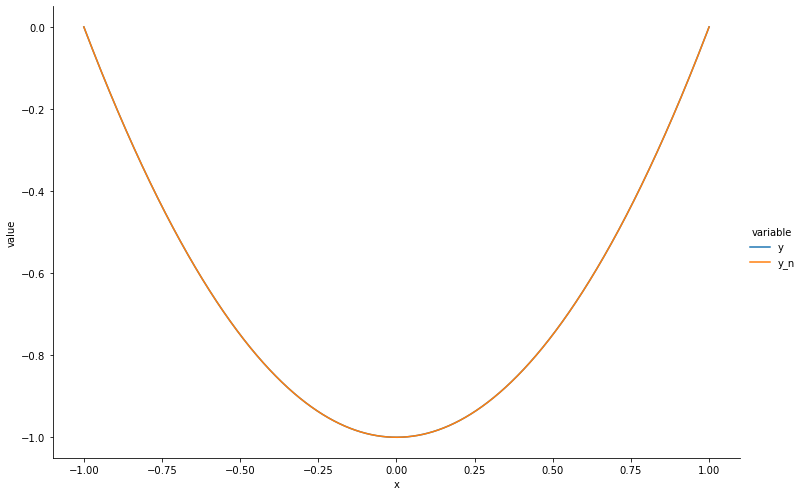

In [145]:
_ = sns.relplot(
    data=df_melted,
    x='x',
    y='value',
    hue='variable',
    kind='line',
    height=7,
    aspect=1.5
    
)

# Accuracy
The derivative of a function $y(x)$ at the point $x_{0}$ could be defined in any of the following three ways, 

<br />

$$
\begin{align}
\frac{\partial y}{\partial x}(x_{0}) &= \lim_{\Delta x \to 0} \frac{y(x_{0}+\Delta x) - y(x_{0})}{\Delta x} \\ \\
\frac{\partial y}{\partial x}(x_{0}) &= \lim_{\Delta x \to 0} \frac{y(x_{0}) - y(x_{0} - \Delta x)}{\Delta x} \\ \\
\frac{\partial y}{\partial x}(x_{0}) &= \lim_{\Delta x \to 0} \frac{y(x_{0} + \Delta x) - y(x_{0} - \Delta x)}{2 \Delta x} \\ \\
\end{align}
$$
<br />
If the derivative of $y(x)$ is continuous at $x_{0}$, then all three expressions produce the same unique answer. However, if $y$ is an approximation on a discrete grid, then these need to evaluted using $\Delta x$. This is known as [finite difference method](https://en.wikipedia.org/wiki/Finite_difference_method). Euler's method looks at the first of these expressions and is therefore referred to as **Forward euler's method**. 

### Taylor Expansion
We can evaluate the accuracy of euler's method using a taylor series where $x \approx x_{0}$, 

<br />

$$
\begin{align}
y(x) &= \sum\limits_{n=0}^\infty  \frac{(x - x_{0})^{n}}{n!} \cdot y^{n}(x_{0}) \\
\end{align}
$$

<br />

Substituting $x$ for $x_{0} + \Delta x$ we have, 

<br />

$$
\begin{align}
y(x_{0} + \Delta x) &= y(x_{0}) + \Delta x \cdot y'(x_{0}) + \frac{\Delta x^{2}}{2!} \cdot y''(x_{0}) + \epsilon
\end{align}
$$

<br />

Re-arranging the LHS this looks like our definition of a derivative using forward euler's method, 

<br />


$$
\begin{align}
\frac{y(x_{0}+\Delta x) - y(x_{0})}{\Delta x} &= y'(x_{0}) + \frac{\Delta x}{2!} \cdot y''(x_{0}) + \epsilon \\
\end{align}
$$

<br />

Subtracting our discrete derivative from the actual yields **truncation error**,

<br />


$$
\begin{align}
error = \frac{y(x_{0}+\Delta x) - y(x_{0})}{\Delta x} - y'(x_{0}) = \frac{\Delta x}{2!} \cdot y''(x_{0}) + \epsilon \\
\end{align}
$$

<br />

This tells us that euler's method is a **first-order numerical technique** because its error term is dominated by $\Delta x$ to the first order (i.e. not $\Delta x^{2}, \Delta x^{3}$). Ignoring the error term, we can finally write down forward euler's method by re-arranging the terms and recognizing that $x_{0} = x_{n}$ and  $x_{n+1} = \Delta x + x_{n}$


<br />


$$
\begin{align}
y(x_{n+1}) &=  y(x_{n}) + y'(x_{n}) \cdot \Delta x \\ \\
y_{n+1} &= y_{n} + f(x_{n}, y_{n}) \cdot \Delta x \\ 
\end{align}
$$

<br />

### Error in numerical solution

In [61]:
fprime = 2

dx = x[1] - x[0]

err_term = (fprime * dx) / 2

y_err = np.zeros(N)
y_err[0] = err_term

for n in range(1, N):
    y_err[n] = y_err[n-1] + err_term

In [62]:
# reshape for plotting
df = pd.DataFrame({
    'x': x,
    'y_err': y_err
})
df.head()

,x,y_err
0,-1.000000,0.020202
1,-0.979798,0.040404
2,-0.959596,0.060606
3,-0.939394,0.080808
4,-0.919192,0.101010


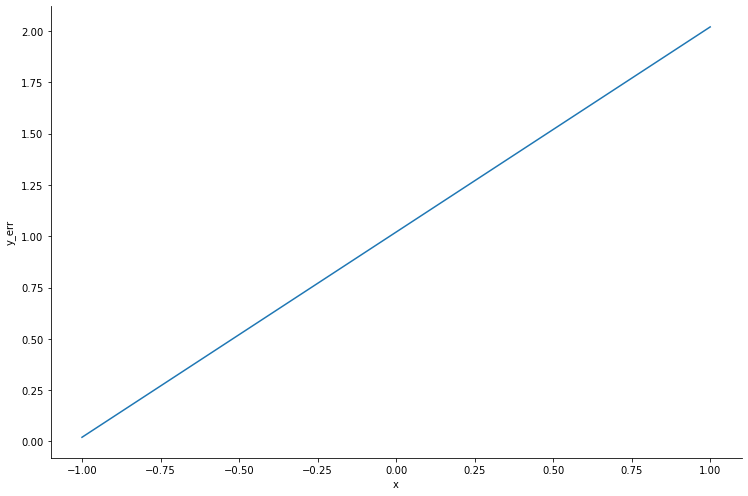

In [63]:
_ = sns.relplot(
    data=df,
    x='x',
    y='y_err',
    kind='line',
    height=7,
    aspect=1.5
    
)